Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All).

Make sure you fill in any place that says YOUR CODE HERE.
Do not write your answer in anywhere else other than where it says YOUR CODE HERE.

First, write your name and NetID below:

In [1]:
NAME = 'Bryce Thurston'
NETID = 'thursto2'

# Problem 3.2. Decision Tree

In this problem, you will use what learned about functions and conditionals to build a [decision tree](https://en.wikipedia.org/wiki/Decision_tree) that predicts the survival of passengers on the Titanic.
Decision trees are used in [decision tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning),
which we will learn more about in the later part of this course when we introduce [machine learning](https://en.wikipedia.org/wiki/Machine_learning).

According to [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning#/media/File:CART_tree_titanic_survivors.png), someone named Stephen Milborrow claims that the following decision tree can predict whether a passenger on the Titanic survived or not:

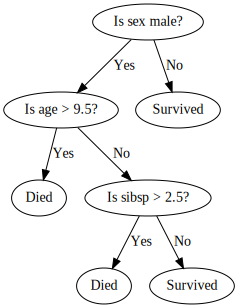

In [2]:
from IPython.display import SVG
SVG('Digraph.gv.svg')

(Here, _sibsp_ is the number of spouses or siblings aboard. )

We will write a function for each question (i.e., each node). We will then combine the three questions into a function named `survived_titanic()` that represents this decision tree, which return `True` if the input values predicts that the passenger would have survived and `False` if the passenger would have died.

## 1. Function: `is_male()`

In the following code cell, write a function named `is_male()` that represents the top node, "_is sex male?_" The function takes one argument (a string), and returns `True` if `sex` is `"male"` and `False` if `sex` is `"female"`.

In [3]:
def is_male(sex):
    if sex == 'male':
        return True
    elif sex == 'female':
        return False
    print('Invalid input. Please enter "male" or "female".')
    raise ValueError

In [4]:
from nose.tools import assert_equal
assert_equal(is_male('male'), True)
assert_equal(is_male('female'), False)

## 2. Function: `is_old()`

In the following code cell, write a function named `is_old()` that represents the second node, "_is age greater than 9.5?_" The function takes one argument (an integer), and returns `True` if `age` is greater 9.5 and `False` if `age` is less than 9.5.

In [5]:
def is_old(age):
    try:
        if float(age) > 9.5: return True
        return False
    except ValueError:
        print('Could not convert argument to float')
        raise

In [6]:
assert_equal(is_old(1), False)
assert_equal(is_old(9), False)
assert_equal(is_old(10), True)
assert_equal(is_old(20), True)
assert_equal(is_old(30), True)

## 3. Function: `has_many_sibsp()`

In the following code cell, write a function named `has_many_sibsp()` that represents the second node, "_is sibsp greater than 2.5?_" (sibsp is the number spouses or siblings aboard.) The function takes one argument (an integer), and returns `True` if `sibsp` is greater 2.5 and `False` if `sibsp` is less than 2.5.

In [7]:
def has_many_sibsp(sibsp):
    try:
        if float(sibsp) > 2.5: return True
        return False
    except ValueError:
        print('Could not convert argument to float')
        raise

In [8]:
assert_equal(has_many_sibsp(0), False)
assert_equal(has_many_sibsp(1), False)
assert_equal(has_many_sibsp(2), False)
assert_equal(has_many_sibsp(2.5), False)
assert_equal(has_many_sibsp(3), True)
assert_equal(has_many_sibsp(4), True)

## 4. Function: `survived_titanic()`

In the following code cell, use the three functions, `is_male()`, `is_old()` and `has_many_sibsp()`, inside a function named `survived_titanic()` to represent the decision tree, "_would the passenger have survived Titanic?_" The function takes a string as the first argument, an integer as the second argument, and another integer as the third argument. It returns `True` if the passenger would have survied Titanic and `False` if the passenger would have died.

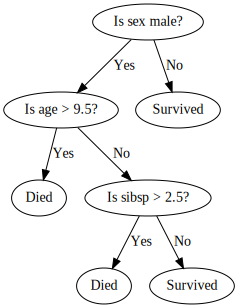

In [9]:
from IPython.display import SVG
SVG('Digraph.gv.svg')

In [10]:
def survived_titanic(sex, age, sibsp):
    if not is_male(sex): return True
    if is_old(age): return False
    return(not has_many_sibsp(sibsp))

In [11]:
assert_equal(survived_titanic('male', 10, 2), False)
assert_equal(survived_titanic('male', 9, 2), True)
assert_equal(survived_titanic('male', 10, 3), False)
assert_equal(survived_titanic('male', 9, 3), False)
assert_equal(survived_titanic('female', 10, 2), True)
assert_equal(survived_titanic('female', 9, 2), True)
assert_equal(survived_titanic('female', 10, 3), True)
assert_equal(survived_titanic('female', 9, 3), True)